In [174]:
using DelimitedFiles
using Plots

# read data
function readWDBC(path, numfeatures=10)
    A = readdlm(path, ',')
    y = A[:, 2]
    X = A[:, 3:3+numfeatures-1]   
    X = [ones(length(y)) X]
    (X, y)
end
path = "/home/minhhn/Documents/ML/Dataset/Breast_Cancer/wdbc.txt"
D = 30
X ,y = readWDBC(path, D)

([1.0 17.99 … 0.4601 0.1189; 1.0 20.57 … 0.275 0.08902; … ; 1.0 20.6 … 0.4087 0.124; 1.0 7.76 … 0.2871 0.07039], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [175]:
σ(z) = 1 ./ (1 .+ exp.(-z)) # sigmoid / logistic function

σ (generic function with 1 method)

Classify: 
* σ(θ'*X) > 0 --> cancer
* σ(θ'*X) < 0 --> non-cancer

In [176]:
function classify(x, θ_best)
	score = x' * θ_best
	if score >= 0.5
		1.0
	else
		0.0
	end
end

classify (generic function with 2 methods)

#### *Training for θ:*
##### 1. loss function: 
* cross-loss entropy:
    $$J(w) = - \sum_{i=1}^{N}(y_i \log z_i + (1 - y_i)\log (1 - z_i))$$
    * $z_i$ = σ(θ'*x)
##### 2. normalize:
        normalize data to min-max standard form and scale upto [-4, 4] to using better values for active function. 
$$col = \frac{col - min_{col}}{max_{col} - min_{col}}$$
$$A_{norm} = A * 8 - 4$$
##### 3. optimize:
        using batch gradient decents
$$ ∇J_j = [σ(x_iθ) - y_i]x_i $$

In [177]:
using Statistics
function normalize(X)
    X_new = X[:, 2:end]
    # μ = mean(X_new, dims=1)
    # s = std(X_new, dims=1)
    # X_new = (X_new .- μ) ./ s
    X_mins = mapslices(minimum, X_new, dims=1)
    X_maxs = mapslices(maximum, X_new, dims=1)
    X_norm = (X_new .- X_mins) ./ (X_maxs .- X_mins)
    X_norm = X_norm .* 8 .- 4
    ([X[:,1] X_norm], col_min, col_max)
end

X_norm, col_min, col_max = normalize(X)

([1.0 0.16829949358701324 … 0.787699586043761 -0.6490882854519215; 1.0 1.1451559468029728 … -2.1312832643406265 -2.216974944247671; … ; 1.0 1.156514742770601 … -0.022866154149418616 -0.3814771087498361; 1.0 -3.705049931373941 … -1.9404691504040996 -3.1945428309064674], 0, 0)

In [178]:
function J(X, y, θ, λ=0.0)
    u = σ(X*θ)
    R = θ'*θ # using L2
    N = length(y)
    -(y'*log.(u) + (1 .- y)'*log.(1 .- u))/N + λ*R
end

J(X_norm, y, rand(31))

23.980322720280338

In [179]:
function ∇J(X, y, θ, λ=0)
    u = σ(X*θ)
    N = length(y)
    X'*(u - y)/N + 2*λ*θ
end

∇J(X_norm, y, ones(31))

31-element Vector{Float64}:
 -0.6169558027798397
  1.3055548924364326
  1.1148317596345667
  1.3460265272094287
  1.8433302244557845
  0.7157545050094541
  1.5984108550316427
  2.0006254876362157
  1.8989686180760226
  0.7962309554623122
  ⋮
  0.9720847008498752
  1.6158525475776424
  2.053810750239422
  0.7338713166864677
  1.75782114098537
  1.8522040809602465
  1.2590917417033387
  1.3772753972487888
  1.6868139711255836

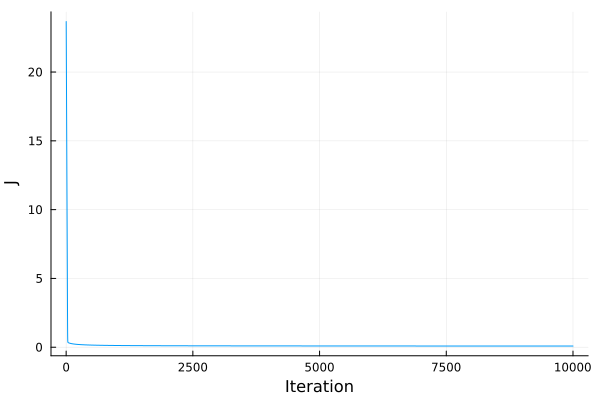

In [180]:
function bgd(X, y, θ_start, λ=0, α=0.01, T=10000) # khong hieu chinh
	θ = θ_start
	Js = []
	for _=1:T
		θ = θ - α*∇J(X, y, θ, λ)
		v = J(X, y, θ, λ)
		push!(Js, v) # ko luu theta trung gian, chi luu gia tri ham
	end
	(θ, Js)
end

θ_best, Js = bgd(X_norm, y, rand(D+1), 0., 0.01, 10_000)

plot(1:10_000, Js, legend=false, xlabel="Iteration", ylabel="J")

In [181]:
prediction = [classify(X_norm[i,:], θ_best) for i=1:length(y)]
acc = sum(prediction .== y)/length(y)

0.968365553602812